In [1]:
import pandas as pd
import numpy as np

In [2]:
df_pswd = pd.read_csv("passwords.csv")
df_pswd.describe()

,rank,value,offline_crack_sec,rank_alt,strength,font_size
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,250.500000,5.602660,5.000096e-01,251.224000,7.432000,10.298000
std,144.481833,8.436005,2.658132e+00,145.052163,5.415536,3.651282
min,1.000000,1.290000,1.110000e-07,1.000000,0.000000,0.000000
25%,125.750000,3.430000,3.210000e-03,125.750000,6.000000,10.000000
50%,250.500000,3.720000,3.210000e-03,251.500000,7.000000,11.000000
75%,375.250000,3.720000,8.350000e-02,376.250000,8.000000,11.000000
max,500.000000,92.270000,2.927000e+01,502.000000,48.000000,28.000000


In [3]:
#Cleaning
#Removing missing values
#Removing wrong enteries in strength
df_pswd.isna().sum()

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

In [4]:
#droping the rows that have missing value
rows = list(df_pswd[df_pswd["strength"].isna()].index)
df_pswd = df_pswd.drop(rows)

In [5]:
#strength supposed to be from 1 to 10 any values other than that need to be removed
df_pswd["strength"].describe()

count    500.000000
mean       7.432000
std        5.415536
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       48.000000
Name: strength, dtype: float64

In [6]:
rows = list(df_pswd[df_pswd["strength"] > 10].index)
df_pswd = df_pswd.drop(rows)

In [7]:
# categorizing strength into 3 categories 
# 0 -> weak
# 1 -> medium
# 2 -> strong
strength_bin = []
strength = list(df_pswd["strength"])
for x in strength:
    if(x >= 0 and x <= 3):
        strength_bin.append(0)
    elif(x >= 4 and x <= 7):
        strength_bin.append(1)
    elif(x >= 8 and x <= 10):
        strength_bin.append(2)
df_pswd["strength_bin"] = strength_bin
df_pswd

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,strength_bin
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0,2
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0,1
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0,1
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0,1
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0,2
...,...,...,...,...,...,...,...,...,...,...
494,495.0,hotrod,cool-macho,3.72,days,3.210000e-03,497.0,7.0,11.0,1
495,496.0,reddog,cool-macho,3.72,days,3.210000e-03,498.0,6.0,10.0,1
496,497.0,alexande,name,6.91,years,2.170000e+00,499.0,9.0,12.0,2
497,498.0,college,nerdy-pop,3.19,months,8.350000e-02,500.0,7.0,11.0,1


In [8]:
df_pswd["time_unit"].unique()

array(['years', 'minutes', 'days', 'seconds', 'months', 'hours', 'weeks'],
      dtype=object)

In [9]:
#standardizing the time units for value to mins
#using standard values for time:
# 1 year = 525600 mins
# 1 day = 1440 min
# 1 month = 43800
# 1 week = 10080
# 1 sec = 1/60 min
online_attack = []
offline_attack = []
df_online = list(df_pswd["value"])
df_offline = list(df_pswd["offline_crack_sec"])
df_time = list(df_pswd["time_unit"])
for i in range(0, len(df_time)):
    if(df_time[i] == 'years'):
        online_attack.append(df_online[i]* 525600)
    elif(df_time[i] == 'days'):
        online_attack.append(df_online[i]* 1440)
    elif(df_time[i] == 'months'):
        online_attack.append(df_online[i]* 43800)
    elif(df_time[i] == 'hours'):
        online_attack.append(df_online[i]* 60)
    elif(df_time[i] == 'weeks'):
        online_attack.append(df_online[i]* 10080)
    elif(df_time[i] == 'seconds'):
        online_attack.append(df_online[i]*(1/60))
    elif(df_time[i] == 'minutes'):
        online_attack.append(df_online[i])
    offline_attack.append(df_offline[i]/60)
df_pswd["online_crack_min"] = online_attack
df_pswd["offline_crack_min"] = offline_attack

In [10]:
#creating a new feature based on password column
password_length = []
for i in list(df_pswd["password"]):
    password_length.append(len(i))
df_pswd["password_length"] = password_length

In [11]:
features = df_pswd.drop(columns= ['value','rank', 'offline_crack_sec', 'rank_alt', 'strength', 'strength_bin','time_unit'], axis =1)
label = df_pswd["strength_bin"]

In [12]:
label

0      2
1      1
2      1
3      1
4      2
      ..
494    1
495    1
496    2
497    1
498    1
Name: strength_bin, Length: 485, dtype: int64

/Users/ibrahimallahbuksh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


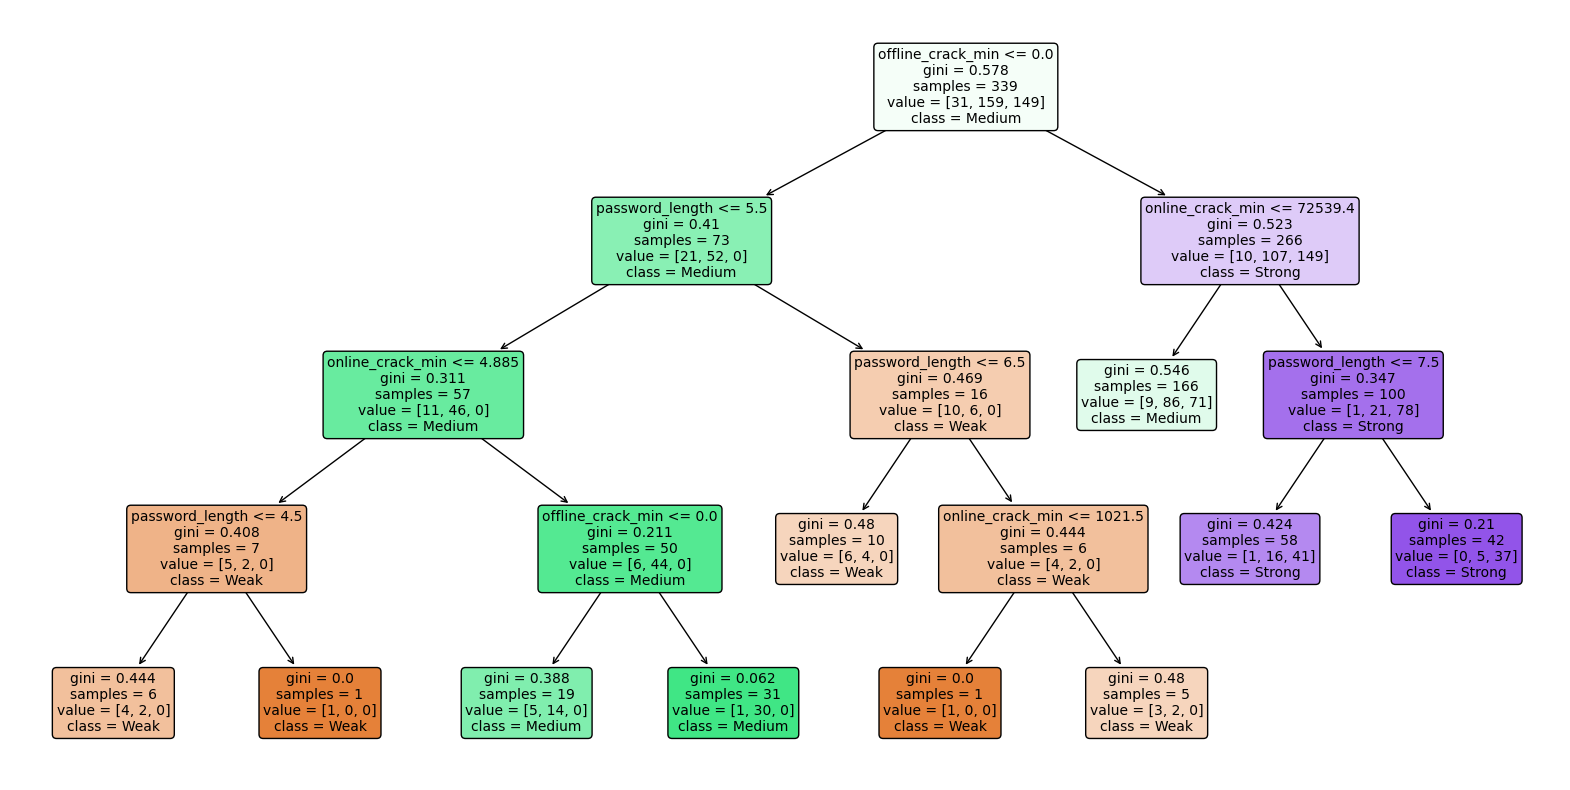

Accuracy: 0.6438356164383562
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.58      0.80      0.67        64
           2       0.79      0.49      0.61        69

    accuracy                           0.64       146
   macro avg       0.66      0.66      0.64       146
weighted avg       0.68      0.64      0.64       146

Confusion Matrix:
[[ 9  3  1]
 [ 5 51  8]
 [ 1 34 34]]


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



features = df_pswd[['online_crack_min', 'offline_crack_min', 'password_length']]
label = df_pswd['strength_bin']  


X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(20,10)) 
plot_tree(clf, 
          feature_names=features.columns,  
          class_names=["Weak", "Medium", "Strong"],
          filled=True, rounded=True,
          fontsize=10)
plt.show()

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
